# Project 5: The war with Star Wars (4 days)



## Background
Survey data is notoriously difficult to handle. Even when the data is recorded cleanly the options for ‘write in questions’, ‘choose from multiple answers’, ‘pick all that are right’, and ‘multiple choice questions’ makes storing the data in a tidy format difficult.  

In 2014, FiveThirtyEight surveyed over 1000 people to write the article titled, America’s Favorite ‘Star Wars’ Movies (And Least Favorite Characters). They have provided the data on GitHub - <https://github.com/fivethirtyeight/data/tree/master/star-wars-survey>.  

A company would like to use this data to figure out if they can predict an interviewing job candidate’s current income based on a few responses about Star Wars movies.  

## GQ 1 - Shorten the column names and clean them up for easier use with pandas.

In [34]:
# Install and load my own package/library https://test.pypi.org/project/My-Cool-Functions/
!pip install -i https://test.pypi.org/simple/ My-Cool-Functions==0.0.5
from my_data.ds_utilities import replace_spaces_with_underscore_in_column_names_and_make_lowercase

Looking in indexes: https://test.pypi.org/simple/


In [35]:
# Other imports
import pandas as pd

In [36]:
# My list of renamed columns
cols = [
'id',
'has seen any',
'fan',
'seen episode 1',
'seen episode 2',
'seen episode 3',
'seen episode 4',
'seen episode 5',
'seen episode 6',
'rank episode 1',
'rank episode 2',
'rank episode 3',
'rank episode 4',
'rank episode 5',
'rank episode 6',
'ranking Han Solo',
'ranking Luke Skywalker',
'ranking Princess Leia Organa',
'ranking Anakin Skywalker',
'ranking Obi Wan Kenobi',
'ranking Emperor Palpatine',
'ranking Darth Vader',
'ranking Lando Calrissian',
'ranking Boba Fett',
'ranking C-3P0',
'ranking R2 D2',
'ranking Jar Jar Binks',
'ranking Padme Amidala',
'ranking Yoda',
'shot first',
'familiar with Expanded Universe',
'fan Expanded Universe',
'fan Star Trek',
'Sex',
'Age',
'Household Income',
'Education',
'Location',
]

In [37]:
# Load, read data, change columns
url = 'https://github.com/fivethirtyeight/data/raw/master/star-wars-survey/StarWars.csv'
df = pd.read_csv(url, names=cols, encoding='unicode_escape')
df = replace_spaces_with_underscore_in_column_names_and_make_lowercase(df)

# Check the size of the data frame
df.shape

(1188, 38)

In [40]:
# Show the columns have been changed
df.columns

Index(['id', 'has_seen_any', 'fan', 'seen_episode_1', 'seen_episode_2',
       'seen_episode_3', 'seen_episode_4', 'seen_episode_5', 'seen_episode_6',
       'rank_episode_1', 'rank_episode_2', 'rank_episode_3', 'rank_episode_4',
       'rank_episode_5', 'rank_episode_6', 'ranking_han_solo',
       'ranking_luke_skywalker', 'ranking_princess_leia_organa',
       'ranking_anakin_skywalker', 'ranking_obi_wan_kenobi',
       'ranking_emperor_palpatine', 'ranking_darth_vader',
       'ranking_lando_calrissian', 'ranking_boba_fett', 'ranking_c-3p0',
       'ranking_r2_d2', 'ranking_jar_jar_binks', 'ranking_padme_amidala',
       'ranking_yoda', 'shot_first', 'familiar_with_expanded_universe',
       'fan_expanded_universe', 'fan_star_trek', 'sex', 'age',
       'household_income', 'education', 'location'],
      dtype='object')

## GQ 2 - Filter the dataset to those that have seen at least one film.

In [6]:
# Overwrite the data frame to those who have at least seen one film
df = df.query("has_seen_any == 'Yes'")

# Proof that there are fewer observations
df.shape

(936, 38)

In [7]:
# Here we can see it worked
print(df.head(5).to_markdown(index=False))

|         id | has_seen_any   | fan   | seen_episode_1                           | seen_episode_2                              | seen_episode_3                              | seen_episode_4                    | seen_episode_5                               | seen_episode_6                           |   rank_episode_1 |   rank_episode_2 |   rank_episode_3 |   rank_episode_4 |   rank_episode_5 |   rank_episode_6 | ranking_han_solo   | ranking_luke_skywalker   | ranking_princess_leia_organa   | ranking_anakin_skywalker   | ranking_obi_wan_kenobi   | ranking_emperor_palpatine                   | ranking_darth_vader   | ranking_lando_calrissian                    | ranking_boba_fett    | ranking_c-3p0      | ranking_r2_d2      | ranking_jar_jar_binks   | ranking_padme_amidala                       | ranking_yoda       | shot_first                       | familiar_with_expanded_universe   | fan_expanded_universe   | fan_star_trek   | sex   | age   | household_income    | education            

## GQ 3 - Please validate that the data provided on GitHub lines up with the article by recreating 2 of their visuals and calculating 2 summaries that they report in the article.

## GQ 4 - Clean and format the data so that it can be used in a machine learning model. Please achieve the following requests and provide examples of the table with a short description the changes made in your report.

- Create an additional column that converts the age ranges to a number and drop the age range categorical column.
- Create an additional column that converts the school groupings to a number and drop the school categorical column.
- Create an additional column that converts the income ranges to a number and drop the income range categorical column.
- Create your target (also known as label) column based on the new income range column.
- One-hot encode all remaining categorical columns.

### A
- Create an additional column that converts the age ranges to a number and drop the age range categorical column.

In [8]:
# See what the values are that need replaced
for i in df['age'].unique():
    print(i)

18-29
nan
30-44
> 60
45-60


In [9]:
# Creating dictionary that maps rating to a number
age_range = {
    "18-29": 1,
    "30-44": 2,
    "45-60": 3,
    "> 60": 4
}

# Use map method to convert the strings to their corresponding numbers and save
df["age_range"] = df.age.map(age_range)

# NaNs to 0
df['age_range'] = df['age_range'].fillna(0)

# Drop the age
df.drop("age", axis = 1, inplace = True)

# View first 25
print(df[['id','age_range']].sample(25).to_markdown(index=False))

|         id |   age_range |
|-----------:|------------:|
| 3290318577 |           2 |
| 3290845046 |           4 |
| 3289943097 |           3 |
| 3288522525 |           3 |
| 3288429092 |           4 |
| 3290681574 |           0 |
| 3288722710 |           3 |
| 3290176563 |           1 |
| 3289815685 |           2 |
| 3288482369 |           1 |
| 3290048884 |           3 |
| 3289993284 |           2 |
| 3290029531 |           4 |
| 3290779524 |           3 |
| 3289864687 |           3 |
| 3290364952 |           3 |
| 3289980534 |           4 |
| 3288458873 |           0 |
| 3290684868 |           2 |
| 3289582774 |           4 |
| 3289757385 |           2 |
| 3289693023 |           4 |
| 3290598307 |           3 |
| 3291684768 |           2 |
| 3292281095 |           1 |


### B
- Create an additional column that converts the school groupings to a number and drop the school categorical column.

In [10]:
# See what the values are that need replaced
for i in df['education'].unique():
    print(i)

High school degree
Some college or Associate degree
Bachelor degree
nan
Graduate degree
Less than high school degree


In [11]:
# Creating dictionary that maps education to a number
education_range = {
    "High school degree":1,
    "Some college or Associate degree":2,
    "Bachelor degree":3,
    "Graduate degree":4,
    "Less than high school degree":5,
}

# Use map method to convert the strings to their corresponding numbers and save
df["education_range"] = df.education.map(education_range)

# NaNs to 0
df['education_range'] = df['education_range'].fillna(0)

# Drop the education
df.drop("education", axis = 1, inplace = True)

# View first 25
print(df[['id','education_range']].head(25).to_markdown(index=False))

|         id |   education_range |
|-----------:|------------------:|
| 3292879998 |                 1 |
| 3292765271 |                 1 |
| 3292763116 |                 2 |
| 3292731220 |                 2 |
| 3292719380 |                 3 |
| 3292684787 |                 1 |
| 3292663732 |                 1 |
| 3292654043 |                 2 |
| 3292640424 |                 2 |
| 3292637870 |                 0 |
| 3292609214 |                 3 |
| 3292596911 |                 4 |
| 3292587240 |                 1 |
| 3292583038 |                 2 |
| 3292580516 |                 3 |
| 3292572872 |                 2 |
| 3292565282 |                 1 |
| 3292562297 |                 2 |
| 3292522349 |                 2 |
| 3292521066 |                 3 |
| 3292511801 |                 3 |
| 3292483200 |                 3 |
| 3292465491 |                 0 |
| 3292420123 |                 2 |
| 3292384040 |                 2 |


### C
- Create an additional column that converts the income ranges to a number and drop the income range categorical column.


In [12]:
# See what the values are that need replaced
for i in df['household_income'].unique():
    print(i)

nan
$0 - $24,999
$100,000 - $149,999
$25,000 - $49,999
$50,000 - $99,999
$150,000+


In [13]:
# Creating dictionary that maps household_income to a number
household_income_range = {
    "$0 - $24,999":1,
    "$25,000 - $49,999":2,
    "$50,000 - $99,999":3,
    "$100,000 - $149,999":4,
    "$150,000+":5,
}

# Use map method to convert the strings to their corresponding numbers and save
df["household_income_range"] = df.household_income.map(household_income_range)

# NaNs to 0
df['household_income_range'] = df['household_income_range'].fillna(0)

# Drop the household_income
df.drop("household_income", axis = 1, inplace = True)

# View first 25
print(df[['id','household_income_range']].head(25).to_markdown(index=False))

|         id |   household_income_range |
|-----------:|-------------------------:|
| 3292879998 |                        0 |
| 3292765271 |                        1 |
| 3292763116 |                        4 |
| 3292731220 |                        4 |
| 3292719380 |                        2 |
| 3292684787 |                        0 |
| 3292663732 |                        0 |
| 3292654043 |                        1 |
| 3292640424 |                        2 |
| 3292637870 |                        0 |
| 3292609214 |                        2 |
| 3292596911 |                        3 |
| 3292587240 |                        0 |
| 3292583038 |                        1 |
| 3292580516 |                        3 |
| 3292572872 |                        0 |
| 3292565282 |                        0 |
| 3292562297 |                        3 |
| 3292522349 |                        0 |
| 3292521066 |                        0 |
| 3292511801 |                        3 |
| 3292483200 |                    

### D
- Create your target (also known as label) column based on the new income range column.

In [14]:
target = df['household_income_range']

### E
- One-hot encode all remaining categorical columns.

In [15]:
# Check the types of each column and see what needs to be encoded still
df.dtypes

id                                  object
has_seen_any                        object
fan                                 object
seen_episode_1                      object
seen_episode_2                      object
seen_episode_3                      object
seen_episode_4                      object
seen_episode_5                      object
seen_episode_6                      object
rank_episode_1                      object
rank_episode_2                      object
rank_episode_3                      object
rank_episode_4                      object
rank_episode_5                      object
rank_episode_6                      object
ranking_han_solo                    object
ranking_luke_skywalker              object
ranking_princess_leia_organa        object
ranking_anakin_skywalker            object
ranking_obi_wan_kenobi              object
ranking_emperor_palpatine           object
ranking_darth_vader                 object
ranking_lando_calrissian            object
ranking_bob

#### Get Dummies Wy

In [16]:
# # Change id column to numbers for ML reasons
# df['id'] = df['id'].astype(float)

# # Encode
# df = pd.get_dummies(df)

# # Reformat columns again
# df = replace_spaces_with_underscore_in_column_names_and_make_lowercase(df)

# # View first 25
# print(df.head(25).to_markdown(index=False))

#### Factorize Way

In [17]:
# Encode
df = df.apply(lambda x: pd.factorize(x)[0])

# Reformat columns again
df = replace_spaces_with_underscore_in_column_names_and_make_lowercase(df)

# View first 25
print(df.shape)
print(df.head(25).to_markdown(index=False))

(936, 38)
|   id |   has_seen_any |   fan |   seen_episode_1 |   seen_episode_2 |   seen_episode_3 |   seen_episode_4 |   seen_episode_5 |   seen_episode_6 |   rank_episode_1 |   rank_episode_2 |   rank_episode_3 |   rank_episode_4 |   rank_episode_5 |   rank_episode_6 |   ranking_han_solo |   ranking_luke_skywalker |   ranking_princess_leia_organa |   ranking_anakin_skywalker |   ranking_obi_wan_kenobi |   ranking_emperor_palpatine |   ranking_darth_vader |   ranking_lando_calrissian |   ranking_boba_fett |   ranking_c-3p0 |   ranking_r2_d2 |   ranking_jar_jar_binks |   ranking_padme_amidala |   ranking_yoda |   shot_first |   familiar_with_expanded_universe |   fan_expanded_universe |   fan_star_trek |   sex |   location |   age_range |   education_range |   household_income_range |
|-----:|---------------:|------:|-----------------:|-----------------:|-----------------:|-----------------:|-----------------:|-----------------:|-----------------:|-----------------:|-----------------:|

### Moving on

In [18]:
# Make everything the same dtype
df = df.astype(float)
df.dtypes

id                                 float64
has_seen_any                       float64
fan                                float64
seen_episode_1                     float64
seen_episode_2                     float64
seen_episode_3                     float64
seen_episode_4                     float64
seen_episode_5                     float64
seen_episode_6                     float64
rank_episode_1                     float64
rank_episode_2                     float64
rank_episode_3                     float64
rank_episode_4                     float64
rank_episode_5                     float64
rank_episode_6                     float64
ranking_han_solo                   float64
ranking_luke_skywalker             float64
ranking_princess_leia_organa       float64
ranking_anakin_skywalker           float64
ranking_obi_wan_kenobi             float64
ranking_emperor_palpatine          float64
ranking_darth_vader                float64
ranking_lando_calrissian           float64
ranking_bob

## GQ 5 - Build a machine learning model that predicts whether a person makes more than $50k.

In [19]:
# Impoort the appropiate libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
# # Sample 100
# df_sample = df.sample(10)
# target = df_sample['household_income_range']
# features = df_sample.drop('household_income_range', axis=1)
# sns.heatmap(df_sample);
# # sns.pairplot(df_sample);

In [21]:

# Drop id because of leakage
features = df.drop('id', axis=1)

# Establish the features
features = df.drop('household_income_range', axis=1)


In [22]:
# Splitting X and y variables into train and test sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=24)

# Creating random forest object
rf = RandomForestClassifier(random_state=24)

# Fit with the training data
rf.fit(X_train, y_train)

# Using the features in the test set to make predictions
y_pred = rf.predict(X_test) 

# Comparing predictions to actual values
print(f'accuracy_score = {accuracy_score(y_test, y_pred)}')

accuracy_score = 0.33807829181494664


In [23]:
# features = df[['education_range',
# 'age_range',
# 'seen_episode_6_star_wars:_episode_vi_return_of_the_jedi',
# 'familiar_with_expanded_universe_no',
# 'fan_star_trek_no',
# 'sex_female']]


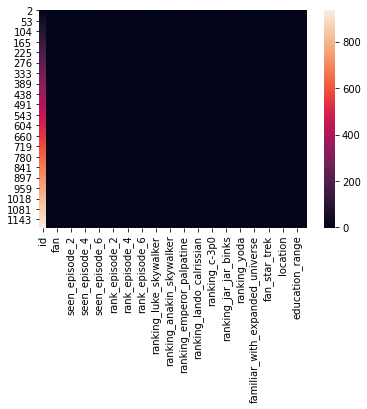

In [24]:
# Set up data in heatmap
sns.heatmap(df);

In [25]:
# Splitting X and y variables into train and test sets using stratified sampling
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=24)

# Creating random forest object
rf = RandomForestClassifier(random_state=24)

# Fit with the training data
rf.fit(X_train, y_train)

# Using the features in the test set to make predictions
y_pred = rf.predict(X_test) 

# Comparing predictions to actual values
print(f'accuracy_score = {accuracy_score(y_test, y_pred)}')

accuracy_score = 0.33807829181494664


In [26]:
feat_imports = (pd.DataFrame(
    {"Feature Names": X_train.columns, 
    "Importances": rf.feature_importances_})
    .sort_values("Importances", ascending=False))

print(feat_imports.to_markdown(index=False))

| Feature Names                   |   Importances |
|:--------------------------------|--------------:|
| location                        |    0.0695097  |
| id                              |    0.0689879  |
| ranking_jar_jar_binks           |    0.0404412  |
| rank_episode_3                  |    0.0386757  |
| rank_episode_6                  |    0.0384128  |
| age_range                       |    0.0381129  |
| rank_episode_4                  |    0.0377181  |
| ranking_emperor_palpatine       |    0.0377064  |
| rank_episode_5                  |    0.0376748  |
| ranking_padme_amidala           |    0.0357382  |
| ranking_boba_fett               |    0.0350018  |
| sex                             |    0.0344758  |
| shot_first                      |    0.0336729  |
| rank_episode_2                  |    0.032822   |
| ranking_lando_calrissian        |    0.03266    |
| education_range                 |    0.0319895  |
| rank_episode_1                  |    0.0317426  |
| ranking_an

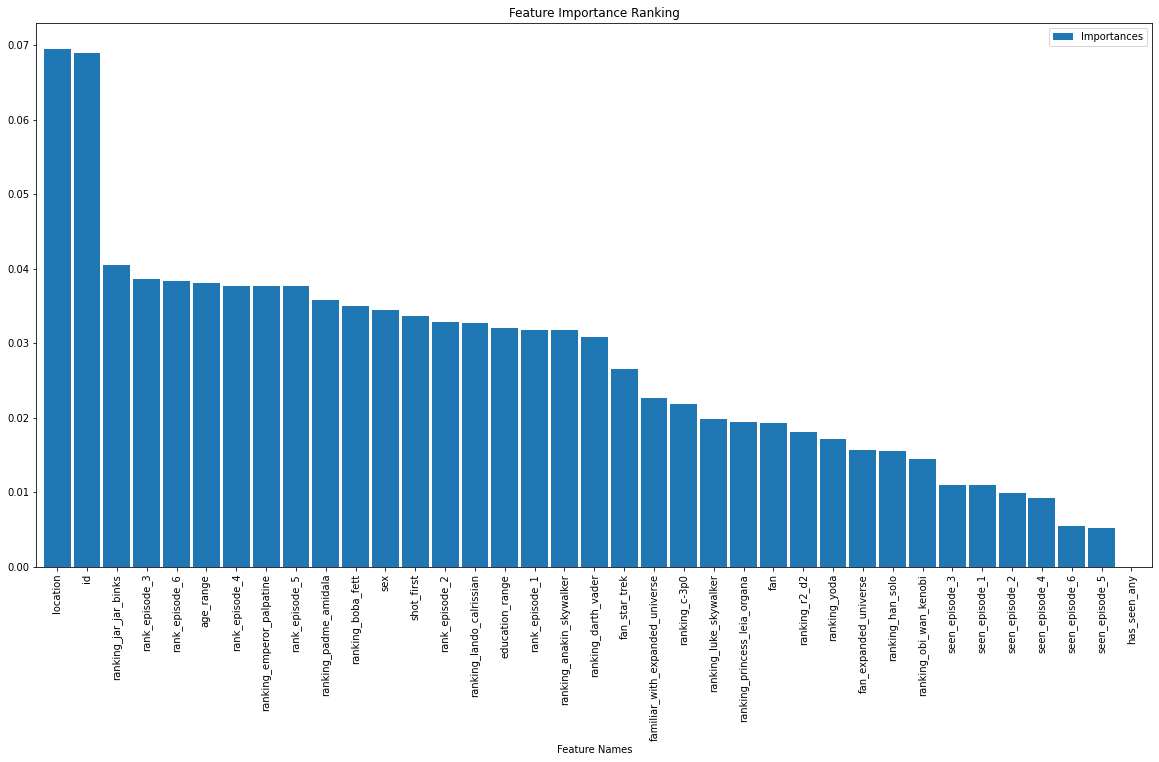

In [27]:

feat_imports.plot.bar(x='Feature Names', y='Importances', rot=90, width=.9,figsize=(20,10), title="Feature Importance Ranking")

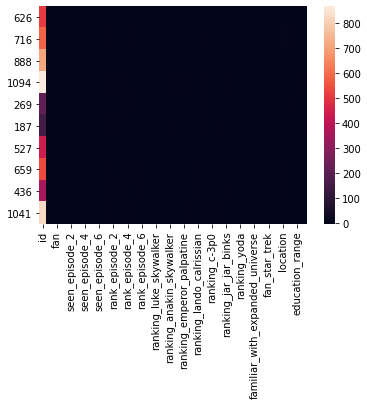

In [28]:
# Sample 100
df_sample = df.sample(10)
target = df_sample['household_income_range']
features = df_sample.drop('household_income_range', axis=1)
sns.heatmap(df_sample);
# sns.pairplot(df_sample);

In [29]:
for i in df.columns:
    print(i)

id
has_seen_any
fan
seen_episode_1
seen_episode_2
seen_episode_3
seen_episode_4
seen_episode_5
seen_episode_6
rank_episode_1
rank_episode_2
rank_episode_3
rank_episode_4
rank_episode_5
rank_episode_6
ranking_han_solo
ranking_luke_skywalker
ranking_princess_leia_organa
ranking_anakin_skywalker
ranking_obi_wan_kenobi
ranking_emperor_palpatine
ranking_darth_vader
ranking_lando_calrissian
ranking_boba_fett
ranking_c-3p0
ranking_r2_d2
ranking_jar_jar_binks
ranking_padme_amidala
ranking_yoda
shot_first
familiar_with_expanded_universe
fan_expanded_universe
fan_star_trek
sex
location
age_range
education_range
household_income_range


In [30]:
features = df[
              ['location',
               'age_range',
               'education_range',
               'household_income_range',
               'fan',
               'sex']]

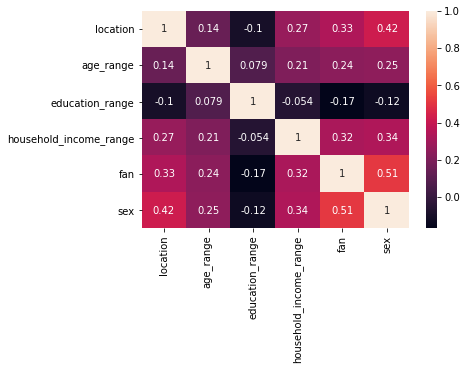

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

# Correlation matrix
cor = df_sample.corr()
cor = features.corr()

# PLotting Heatmap
# plt.figure(figsize = (10,6))
sns.heatmap(cor, annot=True)

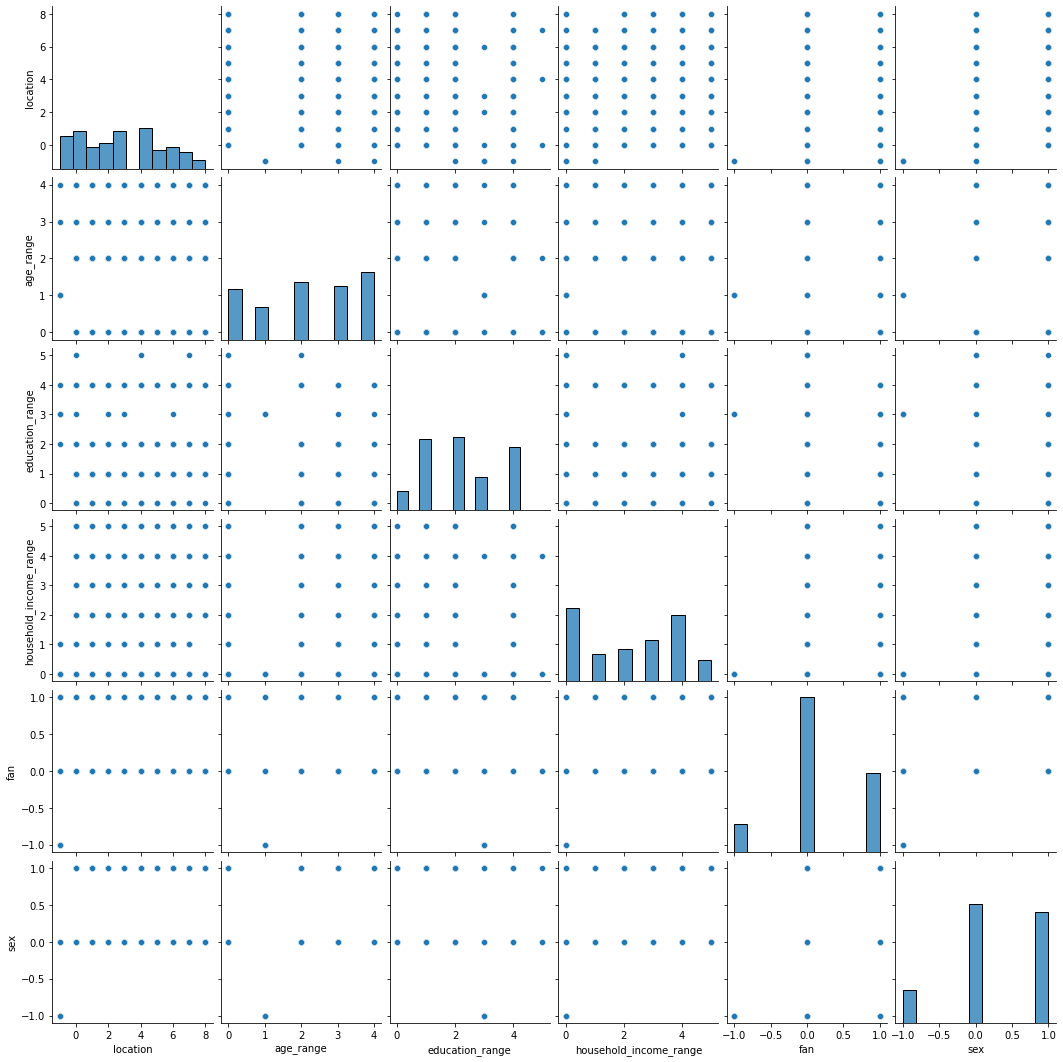

In [32]:
sns.pairplot(features);

# Quiz Stuff

In [33]:
yes = df.query("has_seen_any == 'Yes'")
no = df.query("has_seen_any == 'No'")
print(yes.shape)
print(df.shape)
print(no.shape)
print(936+250)
print(936/(936+250))

print('-'*25)

yes = df.query("has_seen_any == 'Yes' & sex == 'Male'")
print(yes.shape)
no = df.query("has_seen_any == 'No' & sex == 'Male'")
print(no.shape)
print(423/(423+74))

(0, 38)
(936, 38)
(0, 38)
1186
0.7892074198988196
-------------------------
(0, 38)
(0, 38)
0.8511066398390342
